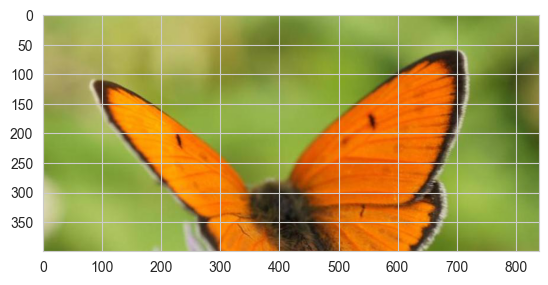

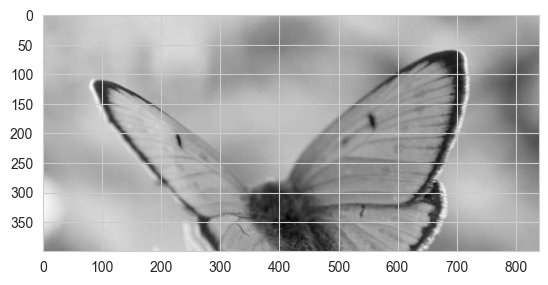

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

img = plt.imread("img_2.png")
# crop
img_cut = img[0:400, :, :]
plt.figure()
plt.imshow(img_cut)
plt.show()

from skimage.color import rgb2gray
gray_img = rgb2gray(img_cut)
plt.imshow(gray_img, cmap='gray')
plt.savefig("input_gray.png")
plt.show()


In [5]:
from PIL import Image

def pixelate(image_path, pixel_size):
    # 打开图片
    img = Image.open(image_path)

    # 获取图片的宽度和高度
    width, height = img.size

    # 计算每个像素块的大小
    pixel_size = max(1, pixel_size)
    block_size = (width // pixel_size, height // pixel_size)

    # 缩小图像，然后放大回原始大小，实现像素化效果
    img = img.resize(block_size, resample=Image.NEAREST)
    img = img.resize((width, height), resample=Image.NEAREST)

    # 保存处理后的图像
    output_path = "pixelated_" + str(pixel_size) + "_" + image_path
    img.save(output_path)

image_path = "img_2.png"
pixel_size = 10
pixelate(image_path, pixel_size)


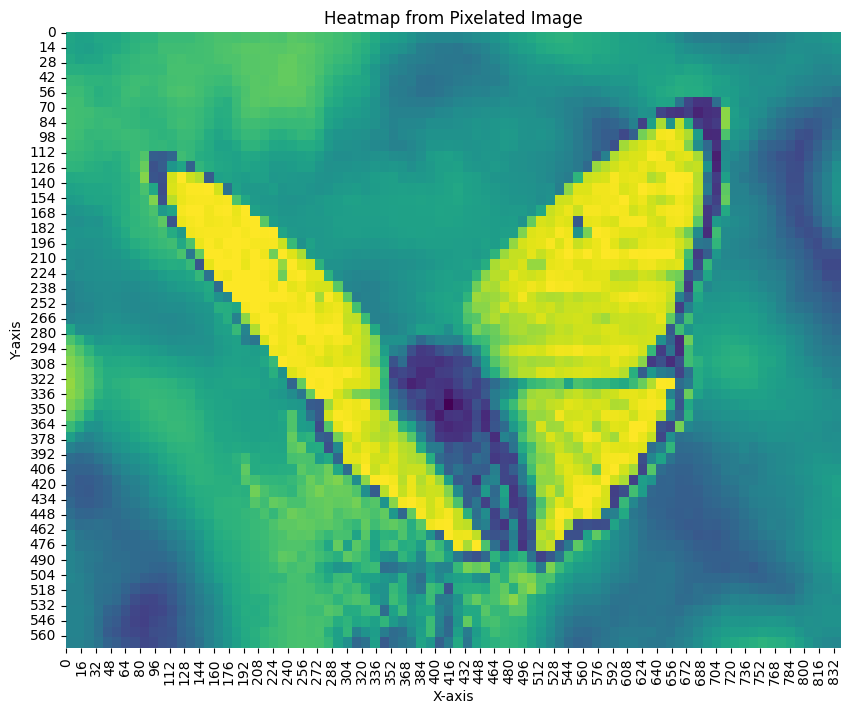

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def heatmap_from_image(image_path, pixel_size):
    # 打开处理后的图片
    img = Image.open("pixelated_" + str(pixel_size) + "_" + image_path)
    # 将图像转为NumPy数组
    img_array = np.array(img)
    # 创建热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(img_array[:, :, 0], cmap="viridis", cbar=False)
    # 设置图像标题和坐标轴标签
    plt.title("Heatmap from Pixelated Image")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    # 显示热力图
    plt.show()

# 使用示例
heatmap_from_image("img_2.png", 10)

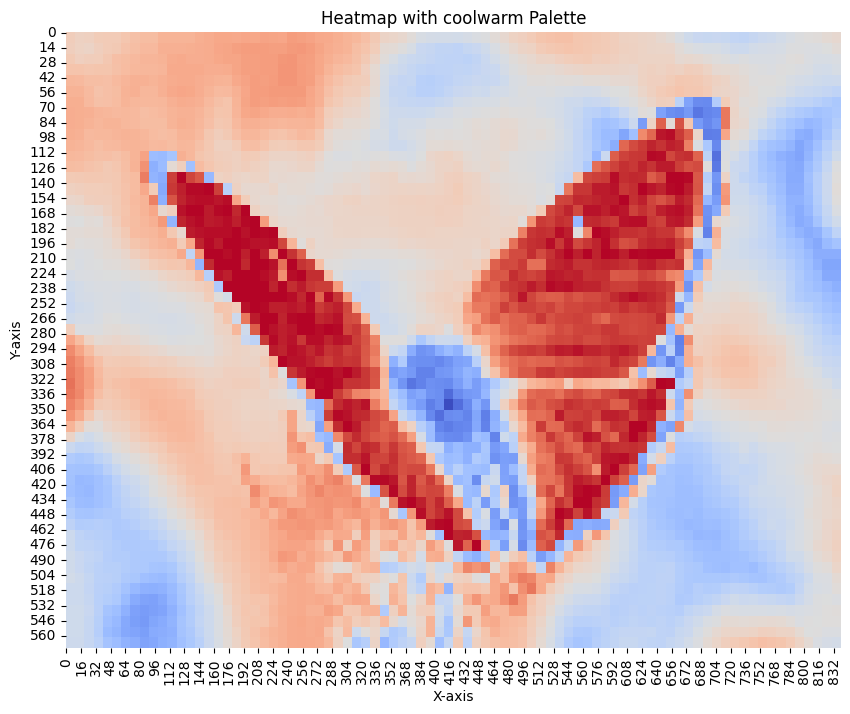

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def heatmap_with_custom_palette(image_path, pixel_size, palette_name):
    # 打开处理后的图片
    img = Image.open("pixelated_" + str(pixel_size) + "_" + image_path)
    # 将图像转为NumPy数组
    img_array = np.array(img)
    # 创建热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(img_array[:, :, 0], cmap=palette_name, cbar=False)
    # 设置图像标题和坐标轴标签
    plt.title(f"Heatmap with {palette_name} Palette")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    # 显示热力图
    plt.show()

# 使用示例
heatmap_with_custom_palette("img_2.png", 10, "coolwarm")
